In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential

In [4]:
##genrators

In [8]:
train_ds=keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\dhruv\Downloads\dog-cat-full-dataset\data\train",
    labels='inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\dhruv\Downloads\dog-cat-full-dataset\data\test",
    labels='inferred',
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 19989 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
##normalize
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [12]:
# Create CNN
model = Sequential()

# Convolution + Pooling Layers
model.add(Conv2D(24, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(48, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

#Flatten + Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Summary
model.summary()

C:\Users\dhruv\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 24)        │             672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 24)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 48)        │          10,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,332,369 (12.71 MB)

 Trainable params: 3,332,369 (12.71 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 314ms/step - accuracy: 0.6515 - loss: 0.6146 - val_accuracy: 0.7256 - val_loss: 0.5510
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 287ms/step - accuracy: 0.7690 - loss: 0.4797 - val_accuracy: 0.7948 - val_loss: 0.4592
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 283ms/step - accuracy: 0.8206 - loss: 0.3929 - val_accuracy: 0.8306 - val_loss: 0.3730
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 283ms/step - accuracy: 0.8575 - loss: 0.3225 - val_accuracy: 0.8416 - val_loss: 0.3797
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 283ms/step - accuracy: 0.8959 - loss: 0.2426 - val_accuracy: 0.8426 - val_loss: 0.3967
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 288ms/step - accuracy: 0.9328 - loss: 0.1677 - val_accuracy: 0.8358 - val_loss: 0.5207
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 186s 297ms/step - accuracy: 0.9525 - loss: 0.1176 - val_accuracy: 0.8310 - val_loss: 0.5805
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 294ms/step - accuracy: 0.9729 -

In [18]:
import matplotlib.pyplot as plt

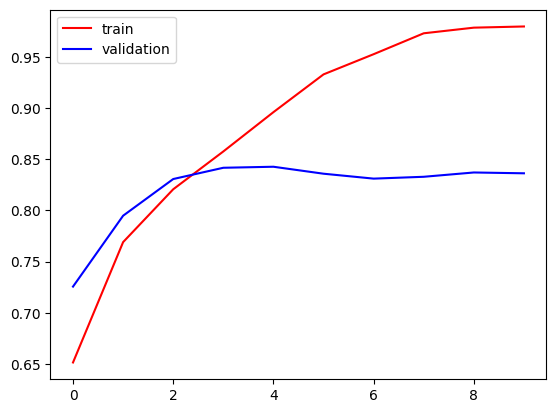

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

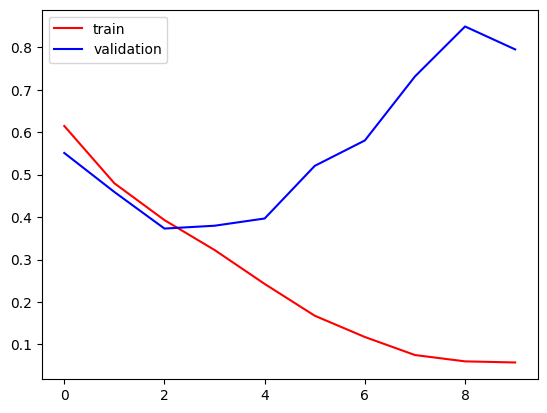

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()